In this notebook, we will:
* deal with the *GeoJSON* Files to create polygonal plots
* learn about projections and coordinate reference
* get practice spatially joining data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

GeoJSON is another type of files that we can use to store geospatial data and create geospatial visualizations. Unlike shapefiles, GeoJSON is a single file making it easier to work with.

The first lines (of many) of *nashville-neighborhoods.geojson* look like this,

```
"type":"Feature",
        "properties":{
      "name":"Historic Buena Vista"
      },"geometry":{
          "type":"MultiPolygon","coordinates":[[[[-86.79511056795417,36.17575964963348],[-86.79403325521203,36.176723819622765],[-86.79395847673587...
```

The properties are mapped to our geodataframe when reading using geopandas like this...

In [2]:
neigborhoods = gpd.read_file("assets/nashville-neighborhoods.geojson")
neigborhoods.head()

,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,West Meade,"MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ..."
4,White Bridge,"MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ..."


Geopandas is installed with some dependencies that makes it easy to deal with:
* the vector data which is the geospatial data made up of points, lines and polygons. This is dealt by *fiona* which is a python API for *OGR* (Open GIS Reference). We will deal with vector graphics through these notebooks.
* the raster data can be thought as grid maps. This is dealt by *GDAL*.

### Colormaps and legends for geopandas plots

We can specify a qualitative (categorial) color map (paletted) using the `cmap` argument in the `plot` method of the `GeoDataFrame`. We can also modify some properties of the legend of the mapped colors using the `legend_kwds` argument.


```python
neigborhoods.plot(
    column = "name",
    legend = True,
    cmap = "Set3",
    legend_kwds = {
        "title": "Neighborhood",
        "loc": "upper left",
        "bbox_to_anchor": (1, 1.03),
        "ncol": 3
    }
)
```

In [3]:
council_dists = gpd.read_file("assets/council_districts.geojson")
council_dists.head()

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,"MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ..."
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,"MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ..."
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,"MULTIPOLYGON (((-86.72850 36.28328, -86.72791 ..."
3,Bill,bill.pridemore@nashville.gov,615-915-1419,615-862-6780,Pridemore,Council Member,9,"MULTIPOLYGON (((-86.68681 36.28671, -86.68706 ..."
4,Robert,robert.swope@nashville.gov,615-308-0577,615-862-6780,Swope,Council Member,4,"MULTIPOLYGON (((-86.74489 36.05316, -86.74491 ..."


<AxesSubplot:>

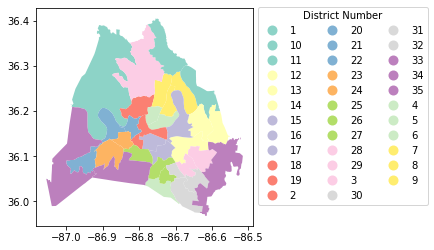

In [4]:
council_dists.plot(
    column = "district",
    legend = True,
    cmap = "Set3",
    legend_kwds = {
        "title": "District Number",
        "loc": "upper left",
        "bbox_to_anchor": (1, 1.03),
        "ncol": 3,
    }
)

In [5]:
school_dists = gpd.read_file("assets/school-district.geojson")
school_dists.head(1)

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."


<AxesSubplot:>

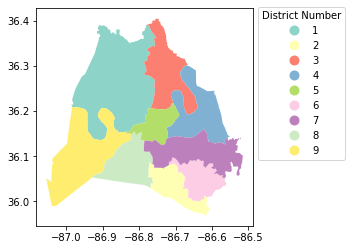

In [6]:
school_dists.plot(
    column = "district",
    legend = True,
    cmap = "Set3",
    legend_kwds = {
        "title": "District Number",
        "loc": "upper left",
        "bbox_to_anchor": (1, 1.03)
    }
)

<AxesSubplot:>

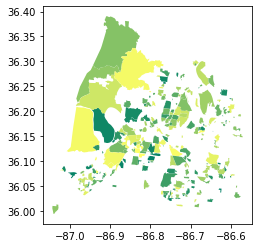

In [7]:
neigborhoods.plot(
    column = "name",
    cmap = "summer"
)

#### Projections and Coordinate Reference Systems

A map projection is the way we visualize the 3d world into a 2d plane. The most common projection is the [Mercator projection](https://en.wikipedia.org/wiki/Mercator_projection#:~:text=The%20Mercator%20projection%20(%2Fm%C9%99r,cartographer%20Gerardus%20Mercator%20in%201569.&text=The%20map%20is%20thereby%20conformal,objects%20away%20from%20the%20equator.)). Setting the coordinate reference system (CRS) to the `GeoDataFrame` tells `geopandas` how to interpret the longitude and latitude coordinates. The common CRSs are:
* EPSG:4326 : this is used by Google Earth and the units here are decimal degrees.
* EPSG:3857 : this is used by Google Maps, Bing Maps, Open Street Maps and the units here are meters.

### Geometry Columns

To create the geometry columns from a dataframe. We can use the `gemoetry` module in the `shapely` library to import a `Point` class that will construct our representation of the geometry. `shapely` is a module that allows us to create and work with points, lines, and ploygons.

In [41]:
from shapely.geometry import Point

schools = pd.read_csv("assets/schools.csv")

schools["geometry"] = schools.apply(lambda row: Point(row.Longitude, row.Latitude), axis = 1)

C:\Users\U\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


To construct a `GeoDataFrame` from the `pd.DataFrame`, we should call the `GeoDataFrame` constructor and pass the `pd.DataFrame` object with specifying the `crs` and `geometry` to the CRS we are going to use, usually `epsg:4326` and the geometry column which is `schools.geometry` here.

```python
schools_geo_df = gpd.DataFrame(
    schools,
    crs = "epsg:4326",
    geometry = schools.geometry
)
```

In [9]:
schools_geo_df = gpd.GeoDataFrame(
    schools,
    crs = "epsg:4326",
    geometry = schools.geometry
)

In [10]:
schools_geo_df.head(2)

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location,geometry
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)",POINT (-86.65885 36.02182)
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)",POINT (-86.83223 36.25296)


We can change the CRS of the geometry column of `GeoDataFrame` using the `to_crs` method.

In [11]:
schools_geo_df.geometry = schools_geo_df.geometry.to_crs(epsg = 3857)

In [12]:
schools_geo_df.head(2)

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location,geometry
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)",POINT (-9646818.808 4303623.790)
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)",POINT (-9666119.539 4335484.432)


### Spatially joining two GeoDataFrames

Let's say we have the 2 following geodataframes

Text(0.5, 1.0, 'School Districts')

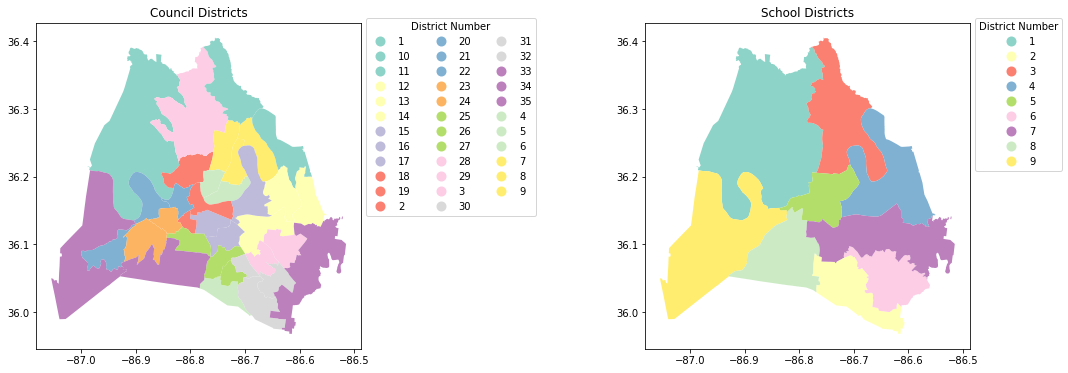

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

council_dists.plot(
    column = "district",
    legend = True,
    cmap = "Set3",
    legend_kwds = {
        "title": "District Number",
        "loc": "upper left",
        "bbox_to_anchor": (1, 1.03),
        "ncol": 3,
    },
    ax = ax[0]
)

ax[0].set_title("Council Districts")

school_dists.plot(
    column = "district",
    legend = True,
    cmap = "Set3",
    legend_kwds = {
        "title": "District Number",
        "loc": "upper left",
        "bbox_to_anchor": (1, 1.03)
    },
    ax = ax[1]
)

ax[1].set_title("School Districts")

We want to know if there are council districts are contained completely within a school district ? Or if there are any council district intersects with any school district ? Here, spatial joining the 2 geodataframes can be very helpful.

We can spatially join the 2 geodataframes using the `sjoin` function.


```python
gpd.sjoin(
    first_geo_df,
    second_goe_df,
    predicate = join operation
)
```

The `predicate` argument here is the type of operation we want to join the two geodataframes based on. It can be:

* `"intersects"` : return all observations where the 2 geodataframes *intersect* each other.
* `"contains"` : return all observations where the first dataframe *compeletely contains* the second one.
* `"within"` : return all observations where the first dataframe *are completely within* the second one.

And we can use of the shape of the resulting geodataframe to know how many observations results from the joining operation.

In [18]:
within_gdf = gpd.sjoin(council_dists, school_dists, predicate = "within")

print("Number of council districts within school districts is {}".format(within_gdf.shape[0]))

Number of council districts within school districts is 11


In [19]:
contains_gdf = gpd.sjoin(school_dists, council_dists, predicate = "contains")

print("Number of school districts contain school districts is {}".format(contains_gdf.shape[0]))

Number of school districts contain school districts is 11


In [20]:
intersects_gdf = gpd.sjoin(school_dists, council_dists, predicate = "intersects")

print("Number of school districts contain school districts is {}".format(intersects_gdf.shape[0]))

Number of school districts contain school districts is 100


In [21]:
within_gdf.head(4)

,first_name_left,email_left,res_phone,bus_phone,last_name_left,position_left,district_left,geometry,index_right,first_name_right,city,zip,email_right,state,last_name_right,address,position_right,term_expir,district_right,phone
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,"MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ...",0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,"MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ...",0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,"MULTIPOLYGON (((-86.72850 36.28328, -86.72791 ...",1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234
3,Bill,bill.pridemore@nashville.gov,615-915-1419,615-862-6780,Pridemore,Council Member,9,"MULTIPOLYGON (((-86.68681 36.28671, -86.68706 ...",1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234


***Note:*** if there are columns with the same name in the 2 geodataframes, the geodataframe resulted from the join operation will append `"_left"` and `"_right"` to know which column are from which dataframe. We can change the name of these columns explictly using `rename` method of the dataframe.

In [23]:
within_gdf.rename(
    columns = {
        "district_left": "council_district",
        "district_right": "school_district"
    },
    inplace = True
)

We can observe which school districts contain the most council districts using a simple groupping and counting.

In [26]:
within_gdf[["council_district", "school_district"]].groupby("school_district").agg("count").sort_values("council_district", ascending = False)

,council_district
school_district,
3,3
1,2
9,2
2,1
5,1
6,1
8,1


In [28]:
contains_gdf.rename(
    columns = {
        "district_right": "council_district",
        "district_left": "school_district"
    },
    inplace = True
)

In [35]:
contains_gdf[["council_district", "school_district"]].groupby("school_district").agg("count").sort_values("council_district", ascending = False)

,council_district
school_district,
3,3
1,2
9,2
2,1
5,1
6,1
8,1
